# The Newton Fractal

This program creates an image of "the Newton Fractal". We use Newton's Method to find solutions to $z^3-1=0$ in the complex plane, and assign our initial guess based on which of the three known solutions it converges to. 

In [158]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [159]:
def f(z):
    return z**3-1

In [160]:
def f1(z):
    return 3*z**2

In [161]:
#Define a function for Newton's Method
def G(z):
    return z - f(z)/f1(z)

In [162]:
#Set Parameters
xmin = -2
xmax = 2
n = 1000
delta = (xmax-xmin)/n

In [163]:
#Build the discretized complex plane
Z = np.zeros((n+1,n+1), dtype = np.complex_)

x = np.arange(xmin,xmax+delta,delta)
y = x[::-1]


for a, num1 in enumerate(x):
    for b, num2 in enumerate(y):
        Z[b][a] =  complex(num1,num2)
       

In [164]:
#perform 50 iterations of Newton's Method
for i in range(50):
    Z = G(Z)

In [165]:
#Define known roots of z^3 - 1 = 0
r1 = complex(1,0)
r2 = complex(-1/2,np.sqrt(3)/2)
r3 = complex(-1/2,-np.sqrt(3)/2)

In [166]:
#Create matrices with value of 1 where within epsilon of root, 0 otherwise
epsilon = 0.0001

Z1 = np.where(abs(Z-r1)<epsilon,1,0)
Z2 = np.where(abs(Z-r2)<epsilon,1,0)
Z3 = np.where(abs(Z - r3)<epsilon,1,0)
Z4 = np.where(Z1+Z2+Z3 == 0,1,0)

In [167]:
#Weighted sum of matrices above
Z = .5*Z1 + 2*Z2 + 3*Z3 + 4*Z4


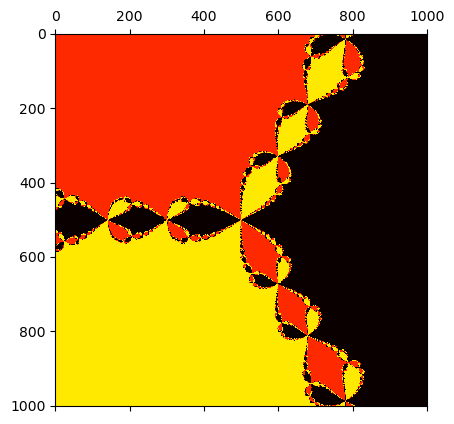

In [168]:
#Color map of matrix values, known as Newton's Fractal
plt.matshow(Z, cmap = 'hot')